In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# 데이터 불러오기
data = pd.read_csv("/Users/gangjimin/PycharmProjects/AI-Overview/week2/data/titanic.csv")
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
# 결측치 확인
print("결측치 개수:")
print(data.isnull().sum())

# 결측치 처리
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.dropna(inplace=True)  # 다른 결측치는 제거

# 레이블 확인
print("변환 전 Survived 분포:")
print(data['Survived'].value_counts())

# 불필요한 컬럼 제거 (예제에서는 PassengerId, Name, Ticket, Cabin 제거 예시)
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(columns=[col for col in drop_columns if col in data.columns], inplace=True)

결측치 개수:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
변환 전 Survived 분포:
Survived
1    134
0     68
Name: count, dtype: int64


In [9]:
# 카테고리형 데이터 인코딩
Survived_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    Survived_encoders[col] = le

# 레이블 변환 후 확인
print("변환 후 Survived 분포:")
print(data['Survived'].value_counts())

변환 후 Survived 분포:
Survived
1    134
0     68
Name: count, dtype: int64


In [10]:
# Feature와 Target 설정
X = data.drop(columns=['Survived'])
y = data['Survived']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (Logistic Regression 및 SVM에 유용)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 리스트
models = {
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

In [11]:
# 모델 학습
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

RandomForest Accuracy: 0.7805
RandomForest Confusion Matrix:
[[ 6  2]
 [ 7 26]]

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.93      0.79      0.85        33

    accuracy                           0.78        41
   macro avg       0.70      0.77      0.71        41
weighted avg       0.84      0.78      0.80        41




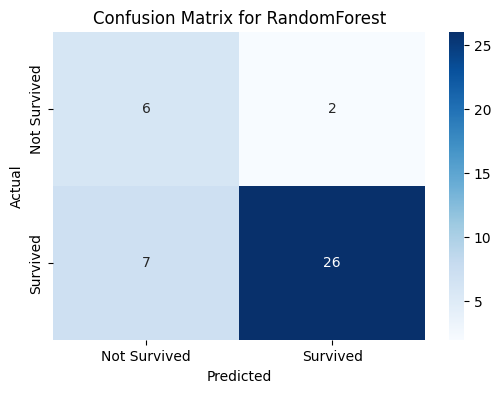

DecisionTree Accuracy: 0.9024
DecisionTree Confusion Matrix:
[[ 7  1]
 [ 3 30]]

DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.97      0.91      0.94        33

    accuracy                           0.90        41
   macro avg       0.83      0.89      0.86        41
weighted avg       0.92      0.90      0.91        41




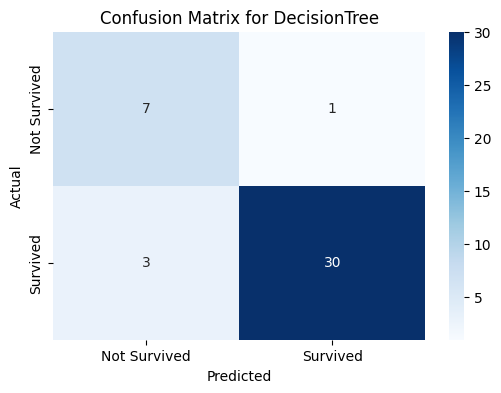

LogisticRegression Accuracy: 0.8049
LogisticRegression Confusion Matrix:
[[ 5  3]
 [ 5 28]]

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.90      0.85      0.88        33

    accuracy                           0.80        41
   macro avg       0.70      0.74      0.72        41
weighted avg       0.82      0.80      0.81        41




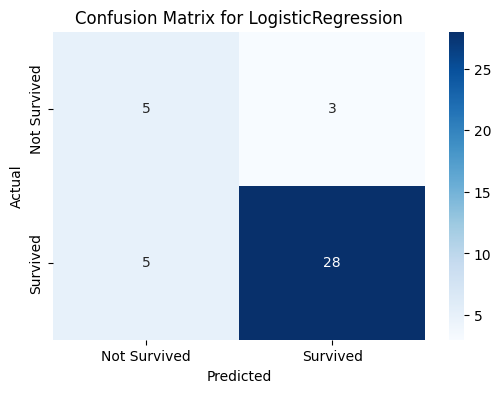

KNN Accuracy: 0.7805
KNN Confusion Matrix:
[[ 7  1]
 [ 8 25]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.88      0.61         8
           1       0.96      0.76      0.85        33

    accuracy                           0.78        41
   macro avg       0.71      0.82      0.73        41
weighted avg       0.86      0.78      0.80        41




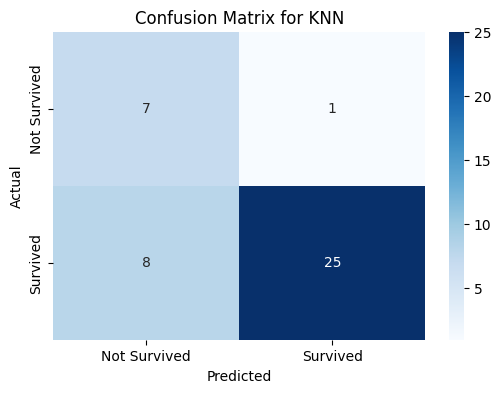

SVM Accuracy: 0.8049
SVM Confusion Matrix:
[[ 6  2]
 [ 6 27]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.93      0.82      0.87        33

    accuracy                           0.80        41
   macro avg       0.72      0.78      0.74        41
weighted avg       0.85      0.80      0.82        41




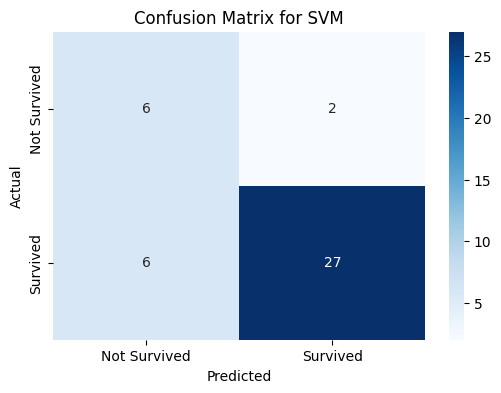

In [12]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Confusion Matrix:\n{cm}\n")
    print(f"{name} Classification Report:\n{report}\n")
    
    # Confusion Matrix 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()